# Kernels in scikit-learn - Lab

## Introduction

In this lab, you'll explore applying several types of kernels on some more visual data. At the end of the lab, you'll then apply your knowledge of SVMs to a real world dataset!

## Objectives

In this lab you will: 

- Create and evaluate a non-linear SVM model in scikit-learn using real-world data 
- Interpret the prediction results of an SVM model by creating visualizations 

## The data

To start, reexamine the final datasets from the previous lab: 

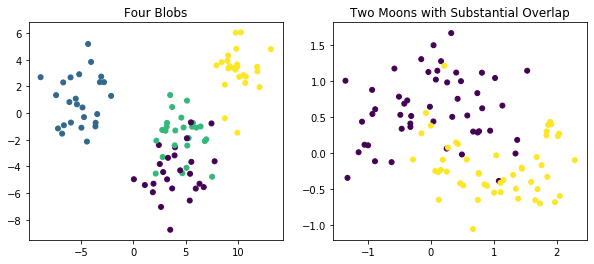

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn import svm
from sklearn.model_selection import train_test_split

import numpy as np

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title('Four Blobs')
X_3, y_3 = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.6, random_state=123)
plt.scatter(X_3[:, 0], X_3[:, 1], c=y_3, s=25)

plt.subplot(122)
plt.title('Two Moons with Substantial Overlap')
X_4, y_4 = make_moons(n_samples=100, shuffle=False , noise=0.3, random_state=123)
plt.scatter(X_4[:, 0], X_4[:, 1], c=y_4, s=25)

plt.show()

## Explore the RBF kernel

Recall how a radial basis function kernel has 2 hyperparameters: `C` and `gamma`. To further investigate tuning, you'll generate 9 subplots with varying parameter values and plot the resulting decision boundaries. Take a look at this [example from scikit-learn](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html) for inspiration. Each of the 9 plots should look like this:

![](images/SVM_rbf.png)

Note that the score represents the percentage of correctly classified instances according to the model. 

In [143]:
from sklearn.svm import SVC
import itertools

def cartesian_product(*arrays):
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

def clfs_from_params(Model, param_grid):
    clfs = []
    for values in itertools.product(*[a.tolist() for a in param_grid.values()]):
        params = dict(zip(param_grid.keys(), values))
        clfs.append(Model(**params))
    return clfs

In [83]:
param_grid.keys()

dict_keys(['gamma', 'degree', 'coef0'])

In [97]:
print(list(param_grid.values()))
for values in itertools.product(list(param_grid.values())):
    print(values)
    print(dict(zip(list(param_grid.keys()), values)))

[array([0.1, 1. ]), array([3, 4]), array([0.1, 2. ])]
(array([0.1, 1. ]),)
{'gamma': array([0.1, 1. ])}
(array([3, 4]),)
{'gamma': array([3, 4])}
(array([0.1, 2. ]),)
{'gamma': array([0.1, 2. ])}


In [75]:

C_range = np.array([0.1, 1, 10])
gamma_range = np.array([0.1, 1, 100])
param_grid = dict(gamma=gamma_range, C=C_range)
clfs = clfs_from_params(SVC, param_grid)


In [23]:
# Prepare your data for plotting
def svc_data_prep(X):
    X1= X[:, 0]
    X2= X[:, 1]
    X1_min, X1_max = X1.min() - 1, X1.max() + 1
    X2_min, X2_max = X2.min() - 1, X2.max() + 1

    x1_coord = np.linspace(X1_min, X1_max, 500)
    x2_coord = np.linspace(X2_min, X2_max, 500)

    X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)
    x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]
    return X1, X2, X1_C, X2_C, x1x2

In [151]:
# Plot the prediction results in 9 subplots  
def clf_plot(clf, X, y, result='predict', fit=True):
    if fit:
        clf.fit(X, y)

    X1, X2, X1_C, X2_C, x1x2 = svc_data_prep(X)
    plt.title(f'gamma: {clf.gamma}, C: {clf.C}')
    if result == 'predict':
        Z = clf.predict(x1x2)  
    if result == 'decision_function':
        # note will only work for 2-class problem
        Z = clf.decision_function(x1x2)  
    Z = Z.reshape(X1_C.shape)
    plt.contourf(X1_C, X2_C, Z, alpha=1)
    plt.scatter(X1, X2, c=y,  edgecolors='gray')

        
def clfs_plot(clfs, X, y, result='predict', fit=True):
    plt.figure(figsize=(11, 11))
    for i, clf in enumerate(clfs):
        plt.subplot(3, 3, i+1)
        clf_plot(clf, X, y, result, fit)
    plt.axis('tight')



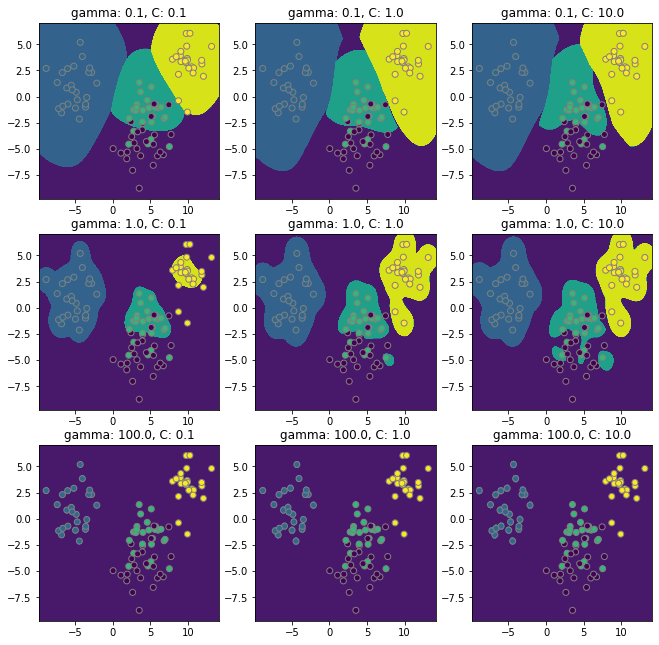

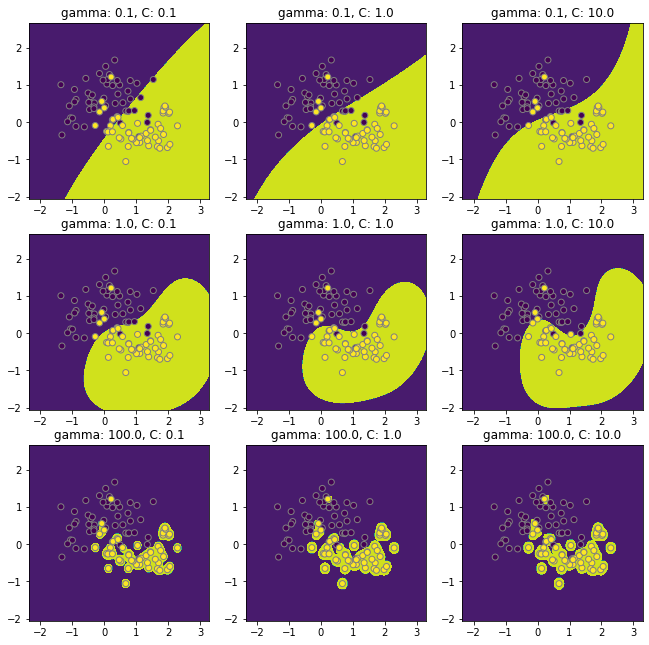

In [45]:
clfs_plot(clfs, X_3, y_3)
clfs_plot(clfs, X_4, y_4)

Repeat what you did before but now, use `decision_function()` instead of `predict()`. What do you see?

In [38]:
x1x2.shape

(250000, 2)

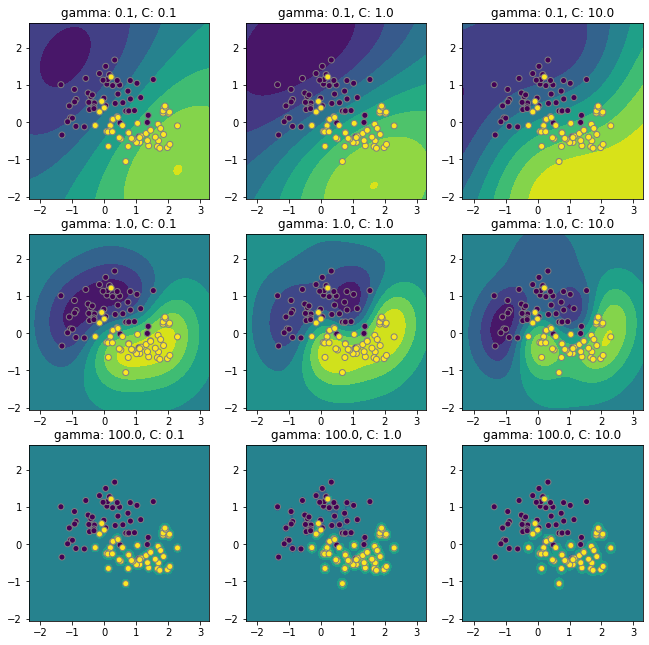

In [53]:
# Plot the decision function results in 9 subplots
clfs_plot(clfs, X_4, y_4, 'decision_function')

## Explore the Polynomial kernel

Recall that the polynomial kernel has 3 hyperparameters:
- $\gamma$, which can be specified using parameter `gamma`
- $r$, which can be specified using parameter `coef0`
- $d$, which can be specified using parameter `degree`

Build 8 different plots using all the possible combinations:
- $r= 0.1$ and $2$
- $\gamma= 0.1$ and $1$
- $d= 3$ and $4$

Note that `decision_function()` cannot be used on a classifier with more than two classes, so simply use `predict()` again.

In [113]:
r_range =  np.array([0.1, 2])
gamma_range =  np.array([0.1, 1])
d_range = np.array([3, 4])
kernel = np.array(['poly'])
param_grid = dict(kernel=kernel, gamma=gamma_range, degree=d_range, coef0=r_range)
poly_clfs = clfs_from_params(SVC, param_grid)


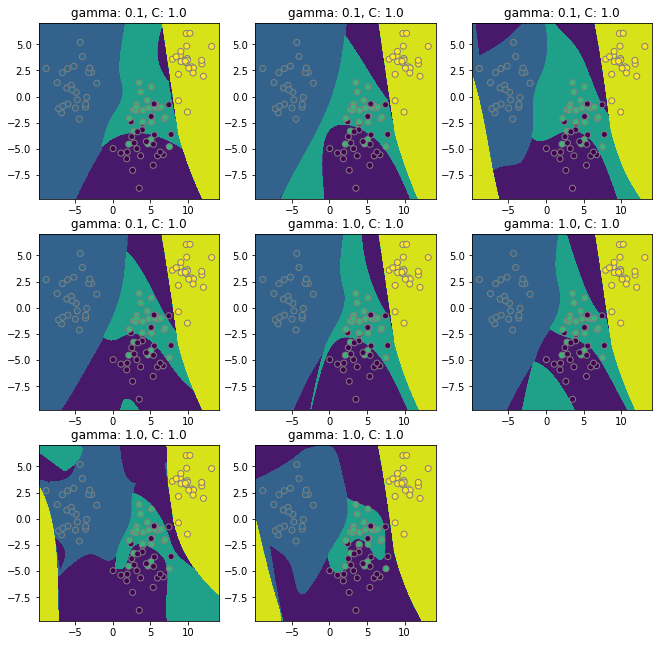

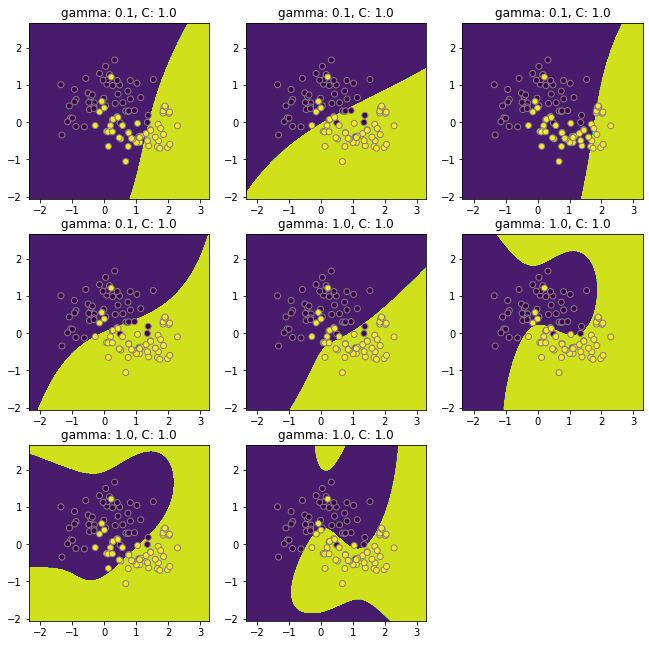

In [65]:
# Plot the prediction results in 8 subplots  
clfs_plot(poly_clfs, X_3, y_3)
clfs_plot(poly_clfs, X_4, y_4)

## The Sigmoid kernel

Build a support vector machine using the Sigmoid kernel.

Recall that the sigmoid kernel has 2 hyperparameters:
- $\gamma$, which can be specified using parameter `gamma`
- $r$, which can be specified using parameter `coef0`


Look at 9 solutions using the following values for $\gamma$ and $r$.

- $\gamma$= 0.001, 0.01, and 0.1
- $r$ = 0.01, 1, and 10

In [61]:
# Create a loop that builds a model for each of the 9 combinations
gamma_range = [0.001, 0.01, 0.1]
r_range = [0.01, 1, 10]
param_grid = dict(kernel=['sigmoid'], gamma=gamma_range, coef0=r_range)
sigmoid_clfs = clfs_from_params(SVC, param_grid)


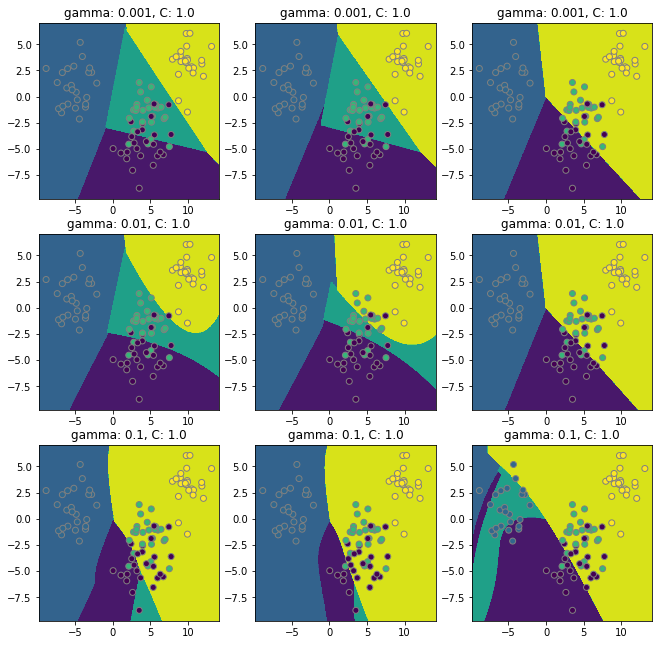

In [63]:
# Plot the prediction results in 9 subplots  
clfs_plot(sigmoid_clfs, X_3, y_3)

## What is your conclusion here?

- The sigmoid kernel is very sensitive to the hyperparameter settings. Especially setting a "wrong" gamma can have a dramatic effect on the model performance
- Our experiments with the Polynomial kernel were more successful

## Explore the Polynomial kernel again, with a train-test split

Explore the same parameters you did before when exploring polynomial kernel 

- Perform a train-test split. Assign 33% of the data to the test set and set the `random_state` to 123 
- Train 8 models using the training set, for each combination of different parameters 
- Plot the results as above, both for the training and test sets 
- Make some notes for yourself on training vs test performance and selecting an appropriate model based on these results 


In [144]:
# Perform a train-test split, then create a loop that builds a model for each of the 8 combinations
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3)

# Create a loop that builds a model for each of the 8 combinations
r_range =  np.array([0.1, 2])
gamma_range =  np.array([0.1, 1]) 
d_range = np.array([3, 4])
kernel = np.array(['poly'])
param_grid = dict(kernel=kernel, gamma=gamma_range, degree=d_range, coef0=r_range)
poly_clfs = clfs_from_params(SVC, param_grid)

In [145]:
# Prepare your data for plotting
poly_clfs[0]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.1,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

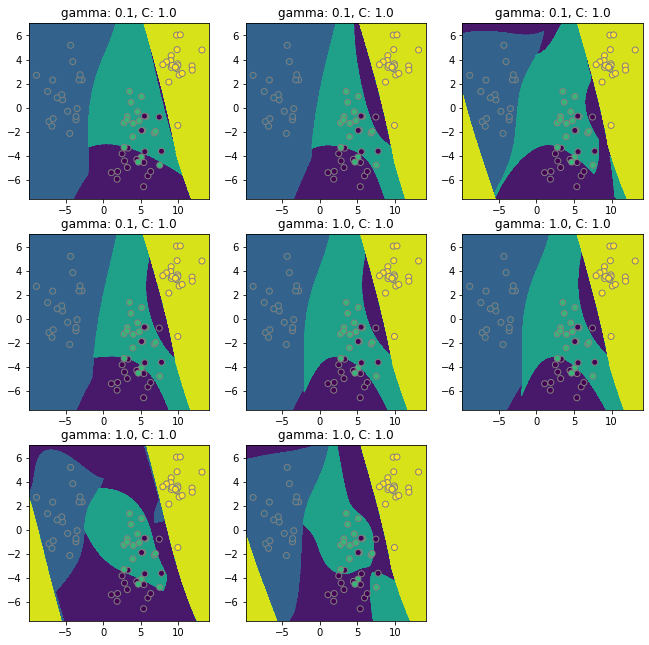

In [149]:
# Plot the prediction results in 8 subplots on the training set  
clfs_plot(poly_clfs, X_train, y_train)

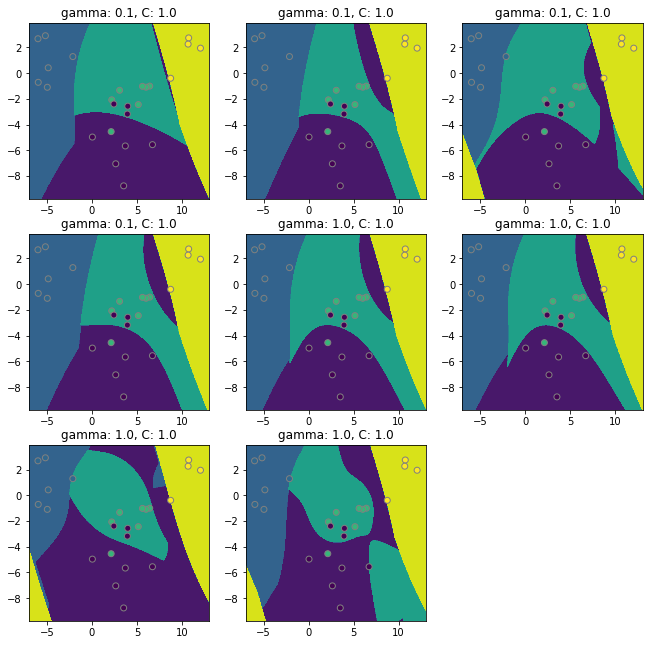

In [152]:
# Now plot the prediction results for the test set
clfs_plot(poly_clfs, X_test, y_test, fit=False)

## A higher-dimensional, real-world dataset

Until now, you've only explored datasets with two features to make it easy to visualize the decision boundary. Remember that you can use Support Vector Machines on a wide range of classification datasets, with more than two features. While you will no longer be able to visually represent decision boundaries (at least, if you have more than three feature spaces), you'll still be able to make predictions.

To do this, you'll use the salaries dataset again (in `'salaries_final.csv'`). 

This dataset has six predictors:

- `Age`: continuous 

- `Education`: Categorical - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool 

- `Occupation`: Categorical - Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces 

- `Relationship`: Categorical - Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried 

- `Race`: Categorical - White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black 

- `Sex`: Categorical - Female, Male 

Simply run the code below to import and preview the dataset. 

In [153]:
import statsmodels as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
salaries = pd.read_csv('salaries_final.csv', index_col=0)
salaries.head()

,Age,Education,Occupation,Relationship,Race,Sex,Target
0,39,Bachelors,Adm-clerical,Not-in-family,White,Male,<=50K
1,50,Bachelors,Exec-managerial,Husband,White,Male,<=50K
2,38,HS-grad,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,53,11th,Handlers-cleaners,Husband,Black,Male,<=50K
4,28,Bachelors,Prof-specialty,Wife,Black,Female,<=50K


The following cell creates dummy variables for all categorical columns and splits the data into target and predictor variables. 

In [167]:
# Create dummy variables and 
# Split data into target and predictor variables
target = pd.get_dummies(salaries['Target'], drop_first=True).iloc[:,0]
xcols = salaries.columns[:-1]
data = pd.get_dummies(salaries[xcols], drop_first=True)


Now build a simple linear SVM using this data. Note that using SVC, some slack is automatically allowed, so the data doesn't have to perfectly linearly separable.

- Create a train-test split of 75-25. Set the `random_state` to 123 
- Standardize the data
- Fit an SVM model, make sure that you set "probability = True"
- After you run the model, calculate the classification accuracy score on both the test set

In [168]:
# Split the data into a train and test set

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=123)

In [169]:
# Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_xf = scaler.transform(X_train)
X_test_xf = scaler.transform(X_test)

> Warning: It takes quite a while to build the model! The score is slightly better than the best result obtained using decision trees, but at the cost of computational resources. Changing kernels can make computation times even longer.

In [170]:
# Fit SVM model  
# ⏰ This cell may take several minutes to run
clf = SVC(probability=True)
clf.fit(X_train_xf, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Calculate the classification accuracy score
clf.score(X_test_xf, y_test)

## Summary

Great, you've got plenty of practice with Support Vector Machines! In this lab you explored kernels and applying SVMs to real-life data!